# 1) Import Modules

In [644]:
import csv

#Standard data-sci libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

In [645]:
#SKLearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesClassifier, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor, Lars, LassoLars,  ElasticNet, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR

#XGBoost
import xgboost as xgb

In [646]:
def rmse(a,b):
    return metrics.mean_squared_error(a,b)**0.5

# 2) Load data

In [647]:
# Loading Train data
train_row_size = 10000
train_data_filename = '13million data/train_set.csv'
train_df = pd.read_csv(train_data_filename, nrows=train_row_size)
train_df.drop(columns=['Household_ID','Row_ID'], inplace=True)
# train_df.to_csv('13million data/train.csv')
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
Vehicle           10000 non-null int64
Calendar_Year     10000 non-null int64
Model_Year        10000 non-null int64
Blind_Make        10000 non-null object
Blind_Model       10000 non-null object
Blind_Submodel    10000 non-null object
Cat1              10000 non-null object
Cat2              10000 non-null object
Cat3              10000 non-null object
Cat4              10000 non-null object
Cat5              10000 non-null object
Cat6              10000 non-null object
Cat7              10000 non-null object
Cat8              10000 non-null object
Cat9              10000 non-null object
Cat10             10000 non-null object
Cat11             10000 non-null object
Cat12             9982 non-null object
OrdCat            10000 non-null object
Var1              10000 non-null float64
Var2              10000 non-null float64
Var3              10000 non-null float64
Var4         

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,3,2005,2005,K,K.78,K.78.2,D,C,F,?,?,C,?,C,A,B,F,D,4,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2005,2003,Q,Q.22,Q.22.3,B,C,A,A,A,E,C,A,B,A,B,D,5,0.217951,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,1,2005,1998,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,A,E,D,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,1,2006,1998,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,B,B,2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,2,2005,2001,D,D.20,D.20.0,J,C,B,?,?,D,?,A,B,A,B,B,5,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [648]:
# Loading Test data
test_row_size = 1000
test_data_filename = '13million data/test_set.csv'
test_df = pd.read_csv(test_data_filename, nrows=test_row_size)
test_df.drop(columns=['Household_ID','Row_ID'], inplace=True)
test_df.to_csv('13million data/test.csv')

print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
Vehicle           1000 non-null int64
Calendar_Year     1000 non-null int64
Model_Year        1000 non-null int64
Blind_Make        1000 non-null object
Blind_Model       1000 non-null object
Blind_Submodel    1000 non-null object
Cat1              1000 non-null object
Cat2              1000 non-null object
Cat3              1000 non-null object
Cat4              1000 non-null object
Cat5              1000 non-null object
Cat6              1000 non-null object
Cat7              1000 non-null object
Cat8              1000 non-null object
Cat9              1000 non-null object
Cat10             1000 non-null object
Cat11             1000 non-null object
Cat12             1000 non-null object
OrdCat            1000 non-null int64
Var1              1000 non-null float64
Var2              1000 non-null float64
Var3              1000 non-null float64
Var4              1000 non-null float

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4
0,1,2008,2001,P,P.24,P.24.0,A,C,B,A,A,D,C,B,A,A,A,B,5,0.258125,1.777519,-0.013495,1.669468,0.330938,0.430648,-0.886198,3.461982,N,-0.23153,-0.266117,2.715490,-0.251419
1,1,2009,2001,P,P.24,P.24.0,A,C,B,A,A,D,C,B,A,B,A,D,5,0.258125,1.777519,-0.013495,1.669468,0.330938,0.430648,-0.886198,3.461982,M,-0.23153,-0.266117,-0.272337,-0.251419
2,1,2008,2003,Y,Y.29,Y.29.0,B,C,A,A,A,D,C,B,B,B,A,C,4,-0.119519,-0.124506,0.217908,-0.191039,0.527193,-0.231408,-0.665021,-0.131601,O,-0.23153,-0.266117,-0.272337,-0.251419
3,1,2009,2003,Y,Y.29,Y.29.0,B,C,A,A,A,D,C,B,B,A,A,B,4,-0.119519,-0.124506,0.217908,-0.191039,0.527193,-0.231408,-0.665021,-0.131601,O,-0.23153,-0.266117,-0.272337,-0.251419
4,1,2008,2006,AU,AU.14,AU.14.1,B,A,B,A,A,B,C,A,B,B,A,C,2,-0.143623,-0.297418,-0.383740,-0.275608,0.069263,-0.685256,-0.591295,-0.163872,O,-0.23153,-0.266117,-0.272337,-0.251419


# 3) Data Pre-processing

## 3.1) Handling Missing Data

In [649]:
train_df.replace("?", np.NaN, inplace=True)

missing_val = train_df.isnull().sum()
missing_val = missing_val[missing_val > 0]
print(missing_val)

Blind_Make        1   
Blind_Model       1   
Blind_Submodel    1   
Cat1              43  
Cat2              3462
Cat3              2   
Cat4              5431
Cat5              5439
Cat6              43  
Cat7              6476
Cat11             18  
Cat12             18  
OrdCat            6   
dtype: int64


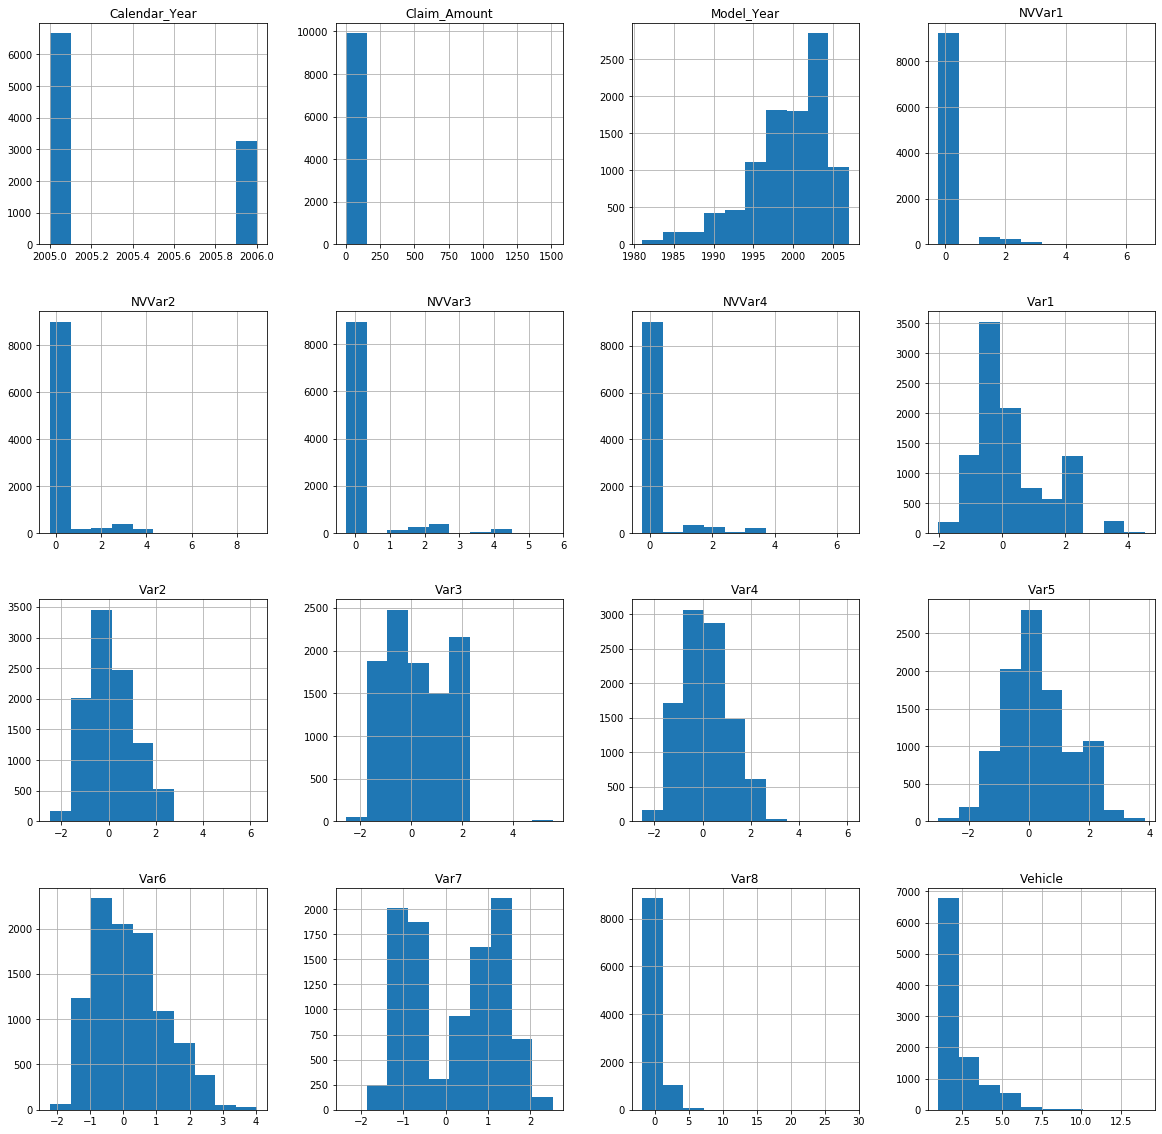

In [650]:
# drop columns that more than 10% missing data
train_df.dropna(thresh=int(len(train_df)*0.9), axis='columns', inplace=True)

# drop rows with NaNs
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)


avail_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[avail_cols + ['Claim_Amount']]
test_df = test_df[avail_cols]

train_df.hist(figsize=(20,20))
plt.show()

## Study the target data

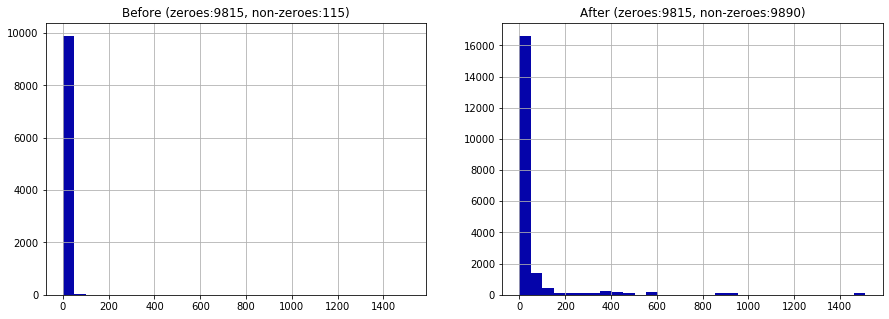

In [651]:
z_count = train_df['Claim_Amount'][train_df['Claim_Amount']==0].shape[0]
nz_count = train_df['Claim_Amount'][train_df['Claim_Amount']>0].shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(train_df['Claim_Amount'], bins=30, color='#0504aa')
ax1.set_title('Before (zeroes:'+str(z_count)+', non-zeroes:'+str(nz_count)+')')
ax1.grid()

# Balancing out the target data 
train_df = train_df.append([train_df[train_df['Claim_Amount']>0]]*85, ignore_index=True)

z_count = train_df['Claim_Amount'][train_df['Claim_Amount']==0].shape[0]
nz_count = train_df['Claim_Amount'][train_df['Claim_Amount']>0].shape[0]

ax2.hist(train_df['Claim_Amount'], bins=30, color='#0504aa')
ax2.set_title('After (zeroes:'+str(z_count)+', non-zeroes:'+str(nz_count)+')')
ax2.grid()
plt.show()

## 3.2) Filter out Outliers

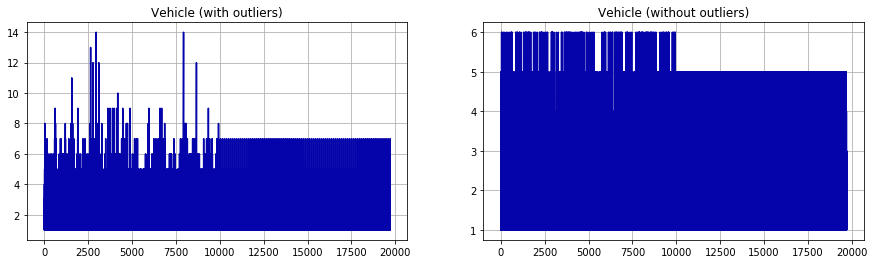

--------------------------------------------------------------------------------------------------


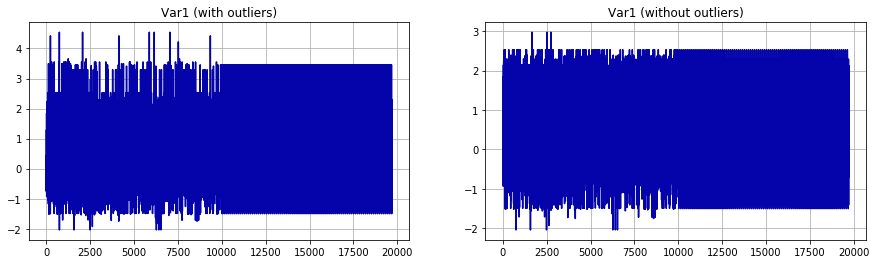

--------------------------------------------------------------------------------------------------


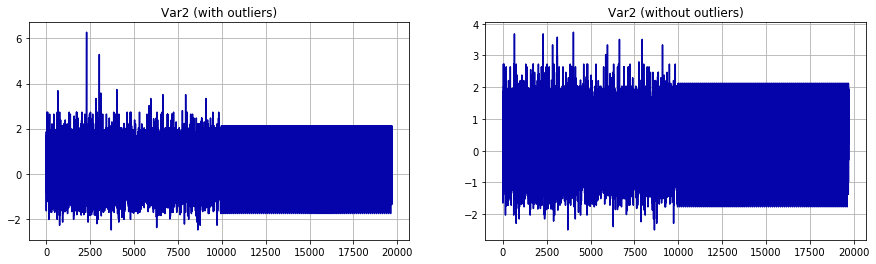

--------------------------------------------------------------------------------------------------


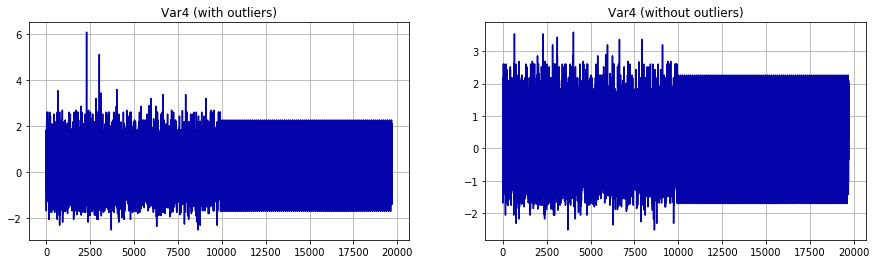

--------------------------------------------------------------------------------------------------


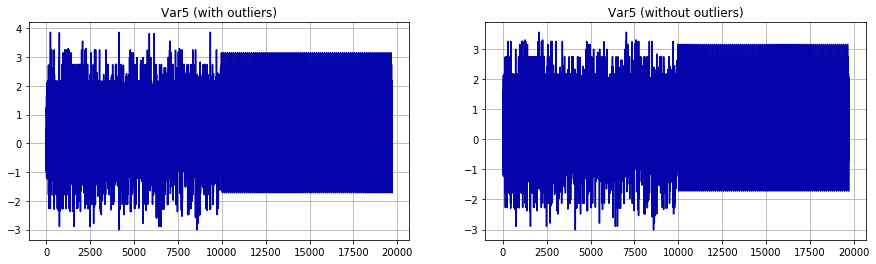

--------------------------------------------------------------------------------------------------


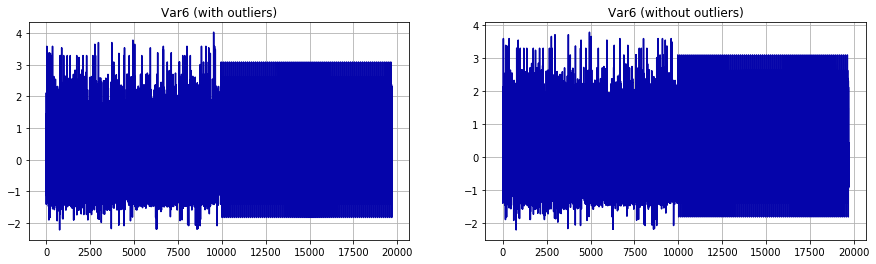

--------------------------------------------------------------------------------------------------


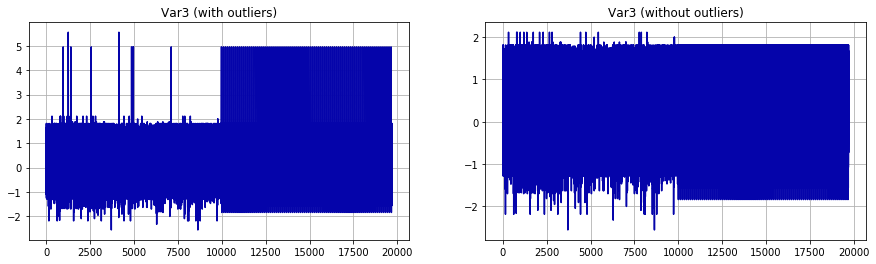

--------------------------------------------------------------------------------------------------


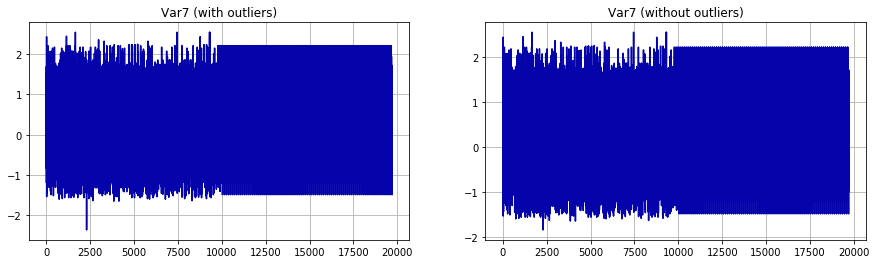

--------------------------------------------------------------------------------------------------


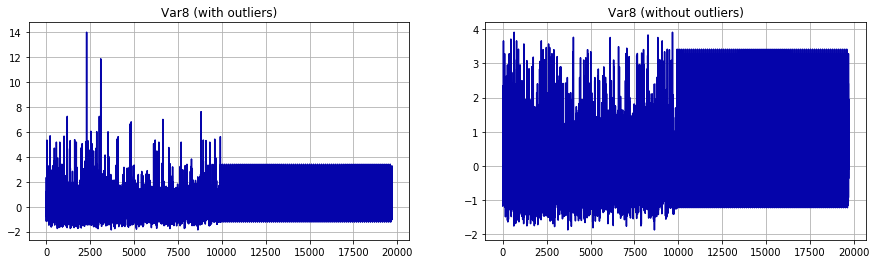

--------------------------------------------------------------------------------------------------


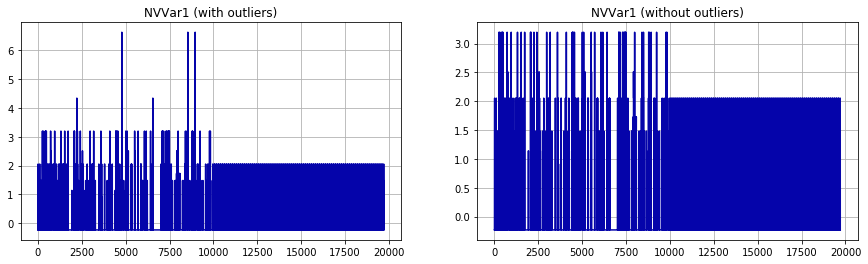

--------------------------------------------------------------------------------------------------


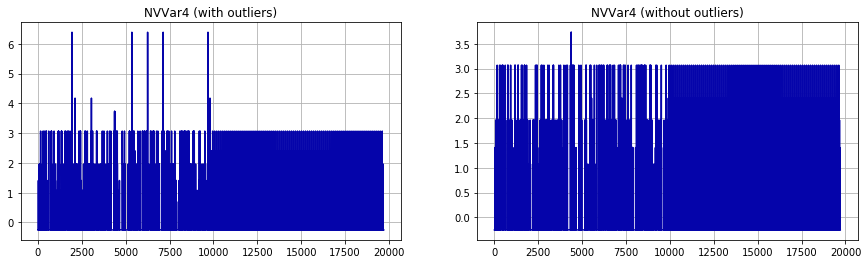

--------------------------------------------------------------------------------------------------


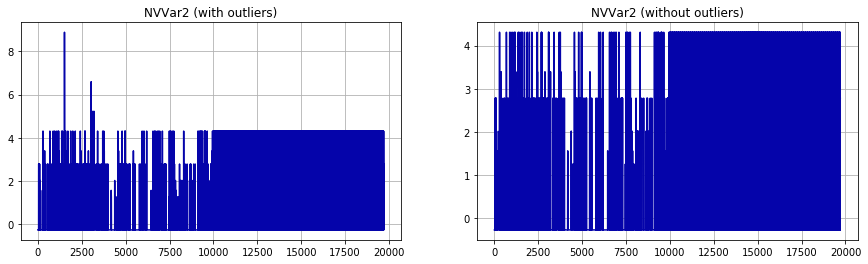

--------------------------------------------------------------------------------------------------


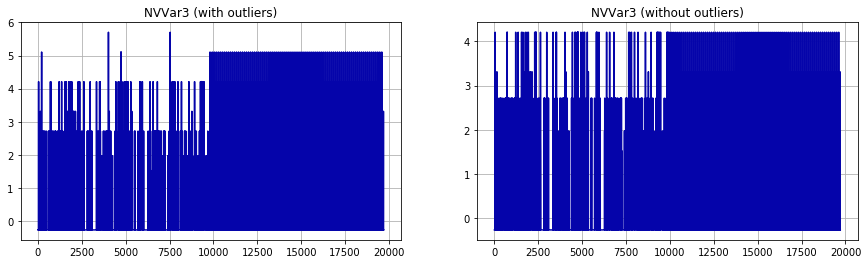

--------------------------------------------------------------------------------------------------


In [652]:
#Dropping rows with outliers
def clean_outliers(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    tolerance_threshold = 2
    low  = df[col].quantile(0.25) - tolerance_threshold*iqr
    high = df[col].quantile(0.75) + tolerance_threshold*iqr
    df_cleaned = df.loc[(df[col] > low) & (df[col] < high)]
    return df_cleaned


def outliers_before_after(before_df,after_df,col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.plot(before_df[col], color='#0504aa')
    ax1.set_title(col+' (with outliers)')
    ax1.grid()

    ax2.plot(after_df[col], color='#0504aa')
    ax2.set_title(col+' (without outliers)')
    ax2.grid()

    plt.show()
    print('--------------------------------------------------------------------------------------------------')
    
    
for col in ['Vehicle','Var1', 'Var2', 'Var4', 'Var5','Var6']:
    outliers_before_after(train_df,clean_outliers(train_df,col),col)
    
# Filtering out Outliers manually
outliers_before_after(train_df,train_df[train_df['Var3'] < 3],'Var3')
train_df = train_df[train_df['Var3'] < 3]

outliers_before_after(train_df,train_df[train_df['Var7'] > -2],'Var7')
train_df = train_df[train_df['Var7'] > -2]

outliers_before_after(train_df,train_df[train_df['Var8'] < 4],'Var8')
train_df = train_df[train_df['Var8'] < 4]

for col in ['NVVar1','NVVar4']:
    outliers_before_after(train_df,train_df[train_df[col] < 4],col)
    train_df = train_df[train_df[col] < 4]
    
for col in ['NVVar2','NVVar3']:
    outliers_before_after(train_df,train_df[train_df[col] < 5],col)
    train_df = train_df[train_df[col] < 5]

## 3.3) Study the skewness

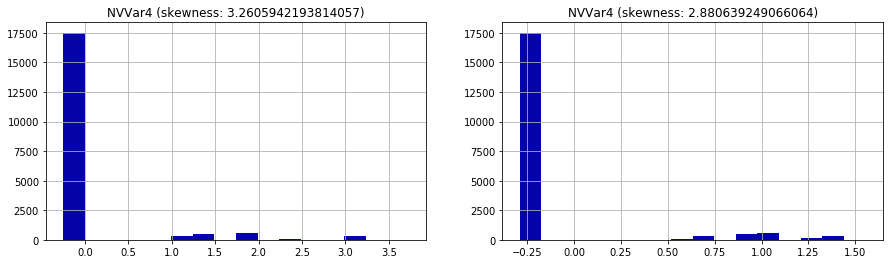

--------------------------------------------------------------------------------------------------


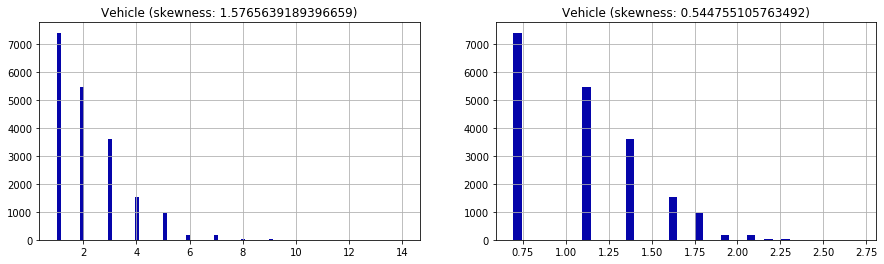

--------------------------------------------------------------------------------------------------


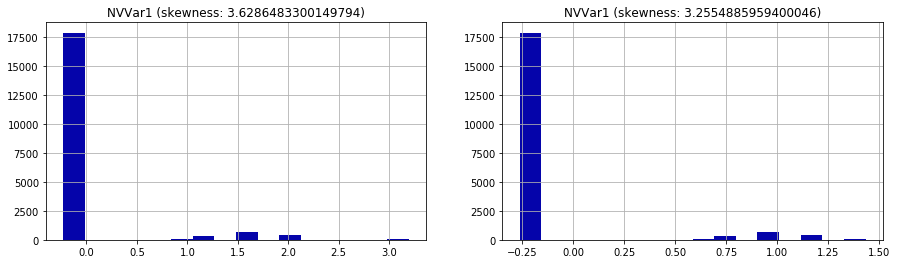

--------------------------------------------------------------------------------------------------


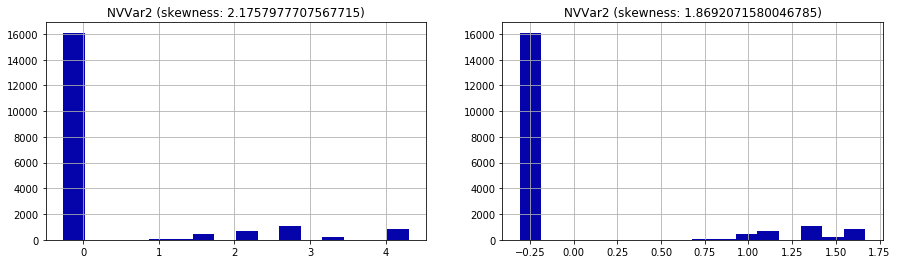

--------------------------------------------------------------------------------------------------


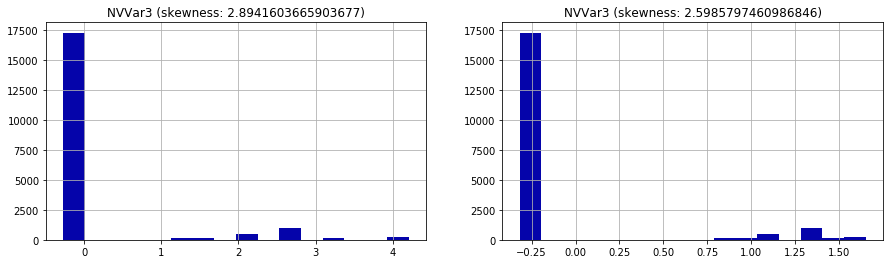

--------------------------------------------------------------------------------------------------


In [653]:
def skew_before_after(df,col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.hist(df[col], bins='auto', color='#0504aa')
    ax1.set_title(col+' (skewness: '+str(df[col].skew(axis = 0))+')')
    ax1.grid()

    df[col] = df[col].apply(np.log1p)

    ax2.hist(df[col], bins='auto', color='#0504aa')
    ax2.set_title(col+' (skewness: '+str(df[col].skew(axis = 0))+')')
    ax2.grid()

    plt.show()
    print('--------------------------------------------------------------------------------------------------')


for col in ['NVVar4','Vehicle', 'NVVar1','NVVar2', 'NVVar3']:
    skew_before_after(train_df,col)

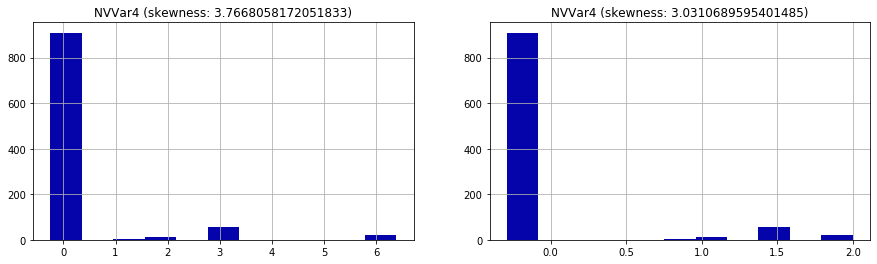

--------------------------------------------------------------------------------------------------


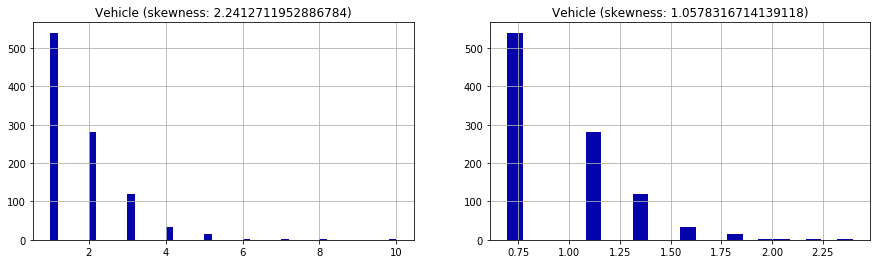

--------------------------------------------------------------------------------------------------


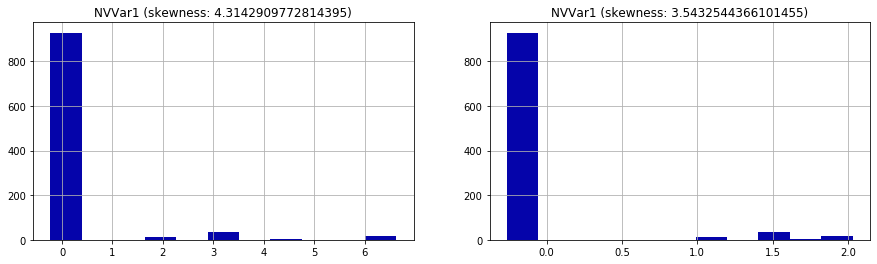

--------------------------------------------------------------------------------------------------


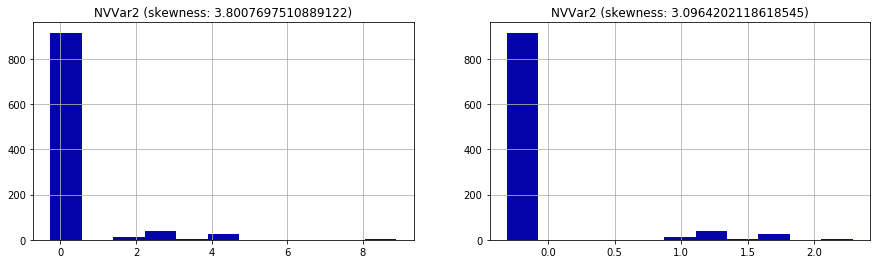

--------------------------------------------------------------------------------------------------


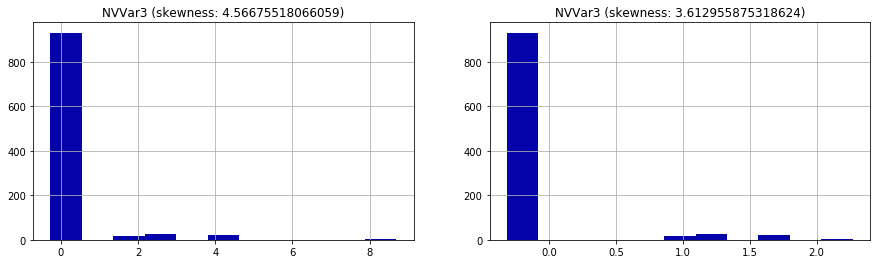

--------------------------------------------------------------------------------------------------


In [654]:
for col in ['NVVar4','Vehicle', 'NVVar1','NVVar2', 'NVVar3']:
    skew_before_after(test_df,col)

## 3.3) Hot One Encoding Categorical data

In [655]:
categorical_columns = [ x for x in train_df.columns if 'Cat' in x ]
categorical_columns += ['Blind_Make','Blind_Model','Blind_Submodel','NVCat']
train_df = pd.get_dummies(train_df, columns=categorical_columns, prefix = categorical_columns)

test_df = pd.get_dummies(test_df, columns=categorical_columns, prefix = categorical_columns)

In [656]:
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19406 entries, 0 to 19704
Columns: 1569 entries, Var7 to NVCat_O
dtypes: float64(14), int64(2), uint8(1553)
memory usage: 31.3 MB
None


,Var7,Var2,Var8,NVVar4,Model_Year,Vehicle,Var5,Calendar_Year,NVVar1,Var1,Var3,NVVar2,Var6,NVVar3,Var4,Claim_Amount,Cat11_A,Cat11_B,Cat11_C,Cat11_D,Cat11_E,Cat11_F,NVCat_A,NVCat_B,NVCat_C,NVCat_D,NVCat_E,NVCat_F,NVCat_G,NVCat_H,NVCat_I,NVCat_J,NVCat_K,NVCat_L,NVCat_M,NVCat_N,NVCat_O,Cat3_A,Cat3_B,Cat3_C,Cat3_D,Cat3_E,Cat3_F,OrdCat_1,OrdCat_2,OrdCat_3,OrdCat_4,OrdCat_5,OrdCat_6,Cat6_B,Cat6_C,Cat6_D,Cat6_E,Cat6_F,Cat10_A,Cat10_B,Cat10_C,Cat1_A,Cat1_B,Cat1_C,Cat1_D,Cat1_E,Cat1_F,Cat1_G,Cat1_H,Cat1_I,Cat1_J,Cat9_A,Cat9_B,Cat8_A,Cat8_B,Cat8_C,Cat12_A,Cat12_B,Cat12_C,Cat12_D,Cat12_E,Cat12_F,Blind_Make_AC,Blind_Make_AF,Blind_Make_AH,Blind_Make_AI,Blind_Make_AJ,Blind_Make_AL,Blind_Make_AN,Blind_Make_AO,Blind_Make_AQ,Blind_Make_AR,Blind_Make_AU,Blind_Make_AV,Blind_Make_AW,Blind_Make_AX,Blind_Make_AY,Blind_Make_AZ,Blind_Make_BB,Blind_Make_BD,Blind_Make_BF,Blind_Make_BG,Blind_Make_BH,Blind_Make_BN,Blind_Make_BO,Blind_Make_BP,Blind_Make_BT,Blind_Make_BU,Blind_Make_BV,Blind_Make_BW,Blind_Make_BY,Blind_Make_BZ,Blind_Make_D,Blind_Make_G,Blind_Make_I,Blind_Make_J,Blind_Make_K,Blind_Make_L,Blind_Make_M,Blind_Make_N,Blind_Make_O,Blind_Make_P,Blind_Make_Q,Blind_Make_R,Blind_Make_U,Blind_Make_W,Blind_Make_X,Blind_Make_Y,Blind_Make_Z,Blind_Model_AC.1,Blind_Model_AC.3,Blind_Model_AC.4,Blind_Model_AF.24,Blind_Model_AF.8,Blind_Model_AH.100,Blind_Model_AH.101,Blind_Model_AH.106,Blind_Model_AH.107,Blind_Model_AH.118,Blind_Model_AH.119,Blind_Model_AH.125,Blind_Model_AH.137,Blind_Model_AH.14,Blind_Model_AH.164,Blind_Model_AH.168,Blind_Model_AH.170,Blind_Model_AH.18,Blind_Model_AH.39,Blind_Model_AH.43,Blind_Model_AH.6,Blind_Model_AH.68,Blind_Model_AH.69,Blind_Model_AH.7,Blind_Model_AH.70,Blind_Model_AH.75,Blind_Model_AH.76,Blind_Model_AH.77,Blind_Model_AH.8,Blind_Model_AH.81,Blind_Model_AI.11,Blind_Model_AI.12,Blind_Model_AI.13,Blind_Model_AI.15,Blind_Model_AI.17,Blind_Model_AI.2,Blind_Model_AI.20,Blind_Model_AI.23,Blind_Model_AI.27,Blind_Model_AI.4,Blind_Model_AI.45,Blind_Model_AI.5,Blind_Model_AJ.1,Blind_Model_AJ.112,Blind_Model_AJ.113,Blind_Model_AJ.121,Blind_Model_AJ.122,Blind_Model_AJ.123,Blind_Model_AJ.129,Blind_Model_AJ.14,Blind_Model_AJ.15,Blind_Model_AJ.17,Blind_Model_AJ.29,Blind_Model_AJ.30,Blind_Model_AJ.32,Blind_Model_AJ.35,Blind_Model_AJ.38,Blind_Model_AJ.40,Blind_Model_AJ.42,Blind_Model_AJ.43,Blind_Model_AJ.44,Blind_Model_AJ.48,Blind_Model_AJ.49,Blind_Model_AJ.5,Blind_Model_AJ.52,Blind_Model_AJ.54,Blind_Model_AJ.55,Blind_Model_AJ.58,Blind_Model_AJ.59,Blind_Model_AJ.64,Blind_Model_AJ.7,Blind_Model_AJ.76,Blind_Model_AJ.77,Blind_Model_AJ.88,Blind_Model_AJ.89,Blind_Model_AJ.9,Blind_Model_AL.13,Blind_Model_AL.14,Blind_Model_AL.16,Blind_Model_AL.23,Blind_Model_AL.24,Blind_Model_AL.31,Blind_Model_AL.33,Blind_Model_AL.42,Blind_Model_AL.45,Blind_Model_AL.46,Blind_Model_AL.49,Blind_Model_AL.5,Blind_Model_AL.53,Blind_Model_AL.6,Blind_Model_AL.63,Blind_Model_AL.72,Blind_Model_AL.88,Blind_Model_AN.11,Blind_Model_AN.16,Blind_Model_AN.2,Blind_Model_AN.3,Blind_Model_AO.1,Blind_Model_AO.10,Blind_Model_AO.11,Blind_Model_AO.12,Blind_Model_AO.13,Blind_Model_AO.20,Blind_Model_AO.25,Blind_Model_AO.28,Blind_Model_AO.29,Blind_Model_AO.33,Blind_Model_AO.6,Blind_Model_AO.7,Blind_Model_AQ.17,Blind_Model_AQ.19,Blind_Model_AQ.20,Blind_Model_AQ.31,Blind_Model_AQ.32,Blind_Model_AQ.39,Blind_Model_AQ.4,Blind_Model_AR.1,Blind_Model_AR.11,Blind_Model_AR.14,Blind_Model_AR.16,Blind_Model_AR.17,Blind_Model_AR.18,Blind_Model_AR.2,Blind_Model_AR.20,Blind_Model_AR.25,Blind_Model_AR.3,Blind_Model_AR.35,Blind_Model_AR.36,Blind_Model_AR.37,Blind_Model_AR.40,Blind_Model_AR.41,Blind_Model_AR.43,Blind_Model_AR.5,Blind_Model_AU.1,Blind_Model_AU.11,Blind_Model_AU.14,Blind_Model_AU.16,Blind_Model_AU.2,Blind_Model_AU.25,Blind_Model_AU.26,Blind_Model_AU.27,Blind_Model_AU.34,Blind_Model_AU.35,Blind_Model_AU.36,Blind_Model_AU.37,Blind_Model_AU.40,Blind_Model_AU.43,Blind_Model_AU.49,Blind_Model_AU.50,Blind_Model_AU.54,Blind_Model_AU.58,Blind_Model_AU.68,Blind_Model_AU.69,Blind_Model_AU.77,Blind_M

## Data split into X and Y

In [657]:
avail_cols = list(set(train_df.columns) & set(test_df.columns))
train_df = train_df[avail_cols + ['Claim_Amount']]
test_df = test_df[avail_cols]

X = train_df.drop(['Claim_Amount'], axis=1)
print('Train X:',train_x.shape)

Y = train_df['Claim_Amount']
print('Train Y:',train_y.shape)

X_test = test_df
print('Test X:',test_x.shape)

Train X: (19406, 355)
Train Y: (19406,)
Test X: (1000, 355)


## Splitting the dataset into Training set and Test set

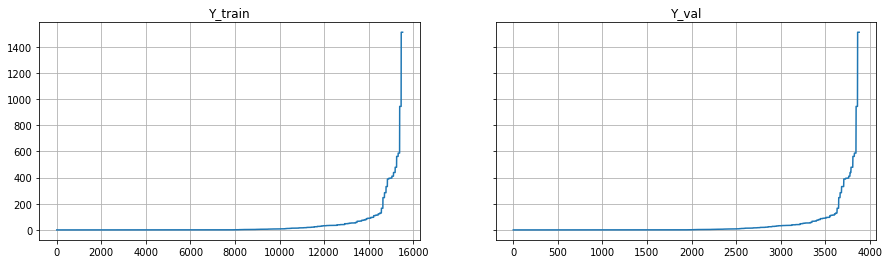

In [658]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x,train_y, test_size=0.2,random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')
ax1.grid()

ax2.plot(np.sort(Y_val))
ax2.set_title('Y_val')
ax2.grid()

plt.show()

## Feature Scaling

In [659]:
col_names = X.columns

# scaling split train and validation data
mm_scaler = MinMaxScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train), columns=col_names)
X_val = pd.DataFrame(mm_scaler.transform(X_val), columns=col_names)

# scaling full train and test data
mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=col_names)
X_test = pd.DataFrame(mm_scaler.transform(X_test), columns=col_names)

## Feature Selection (Univariate Filter Method)

In [660]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k = 10
Kbestfeatures = SelectKBest(score_func=f_regression, k=k)
fit = Kbestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print K best features
best_features = featureScores.nlargest(k,'Score')['Specs'].tolist()


# featureScores = featureScores[featureScores['Score'] > 10]
# print(featureScores.sort_values(by=['Score'],ascending=False))
# best_features = featureScores['Specs'].tolist()

                     Specs       Score
38   Blind_Model_X.45       939.148503
187  Blind_Submodel_Y.29.0  580.408498
233  Blind_Model_Y.29       433.409424
8    Cat8_C                 206.709773
264  Cat11_E                164.671542
142  OrdCat_5               156.995653
330  Cat6_D                 154.879452
41   Blind_Make_X           148.203344
302  Blind_Make_AL          134.150510
7    Blind_Make_K           125.832286


## Evaluate & Fit Models

In [0]:
def allmodels():
    classifiers = [
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    PassiveAggressiveRegressor(),
    SGDRegressor(),
    TheilSenRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor()
]
    names = [
    "AdaBoostRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "GradientBoostingRegressor",
    "RandomForestRegressor",
    "PassiveAggressiveRegressor",
    "SGDRegressor",
    "TheilSenRegressor",
    "KNeighborsRegressor",
    "DecisionTreeRegressor",
    "ExtraTreeRegressor"
]
    return classifiers,names
classifiers,names=allmodels()

In [0]:
iterations=2
for i in range(iterations):  
    result=[]
    for classifier,name in zip(classifiers,names):
        classifier.fit(X_train, Y_train)
        predictions=classifier.predict(X_test)
        predictions[predictions<0]=0
        result.append(rmse(predictions,Y_test))
    model_result=pd.DataFrame(data=result,index=names,columns=['rmse']).sort_values(by="rmse" , ascending=True)
    print(model_result)

NameError: ignored

In [0]:
xgboost_model = xgb.XGBRegressor(learning_rate=0.05
                                 , max_depth=12, n_estimators=10, alpha=10, objective ='reg:linear', colsample_bytree = 0.3
                                )
xgboost_model.fit(X_train,Y_train)
y_pred = xgboost_model.predict(X_test)
print('rmse',metrics.mean_squared_error(Y_test,y_pred)**0.5)